***3. Image Segmentation***

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Input
from tensorflow.keras.models import Model

# Define U-Net model
def unet_model(input_shape):
    inputs = Input(input_shape)
    
    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    # Decoder
    c2 = Conv2DTranspose(64, (2, 2), strides=(2, 2), activation='relu', padding='same')(p1)
    c2 = concatenate([c2, c1])
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c2)
    
    return Model(inputs, outputs)

# Compile and train the model
model = unet_model((128, 128, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Example dummy data for demonstration
x_train = tf.random.normal((10, 128, 128, 3))
y_train = tf.random.uniform((10, 128, 128, 1), maxval=2, dtype=tf.int32)

history = model.fit(x_train, y_train, epochs=5)

# Save the model
model.save("unet_segmentation.h5")


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step - accuracy: 0.4997 - loss: 0.6953
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.5010 - loss: 0.6985
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.5019 - loss: 0.6941
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.5005 - loss: 0.6952
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.5005 - loss: 0.6954


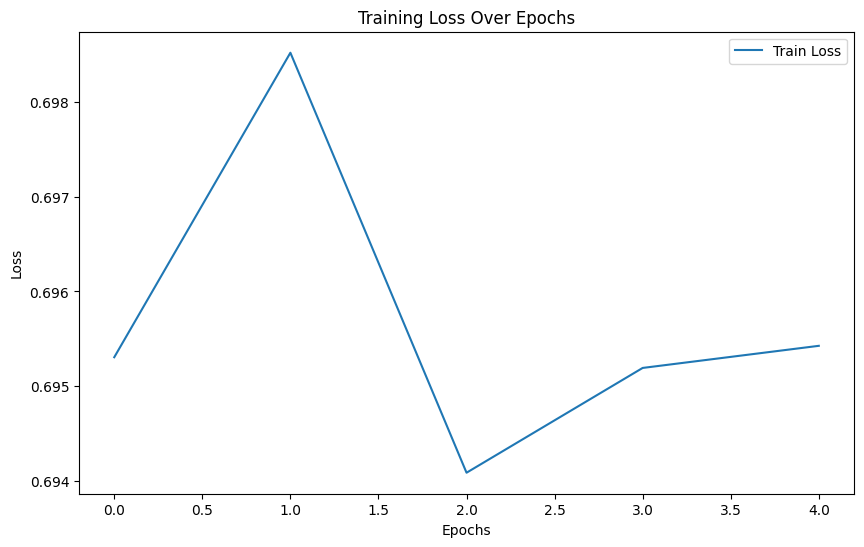

In [6]:
# Plot training loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()
